In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [97]:
#đọc dữ liệu từ csv
df = pd.read_csv('matches.csv')
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
1,2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
2,3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
3,4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
4,5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,38,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1.0,2.0,...,Match Report,NaN,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
2717,39,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0.0,4.0,...,Match Report,NaN,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
2718,40,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0.0,1.0,...,Match Report,NaN,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
2719,41,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0.0,2.0,...,Match Report,NaN,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


# **Biểu đồ Heatmap biểu diễn hệ số tương quan giữa các thông số**

# Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt
# Xử lý dữ liệu
- Trích xuất các thuộc tính kiểu số ( numeric ) và trong đó bỏ đi một số thuộc tính không cần thiết như thuộc tính ghi chú, số thứ tự và năm mùa giải.
# Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [99]:
def heatmap_first(df):
    df = df.drop(['notes','Unnamed: 0','season'], axis=1)
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
    plt.title("So sánh hệ số tương quan giữa các thông số", fontsize= 40)
    plt.show()


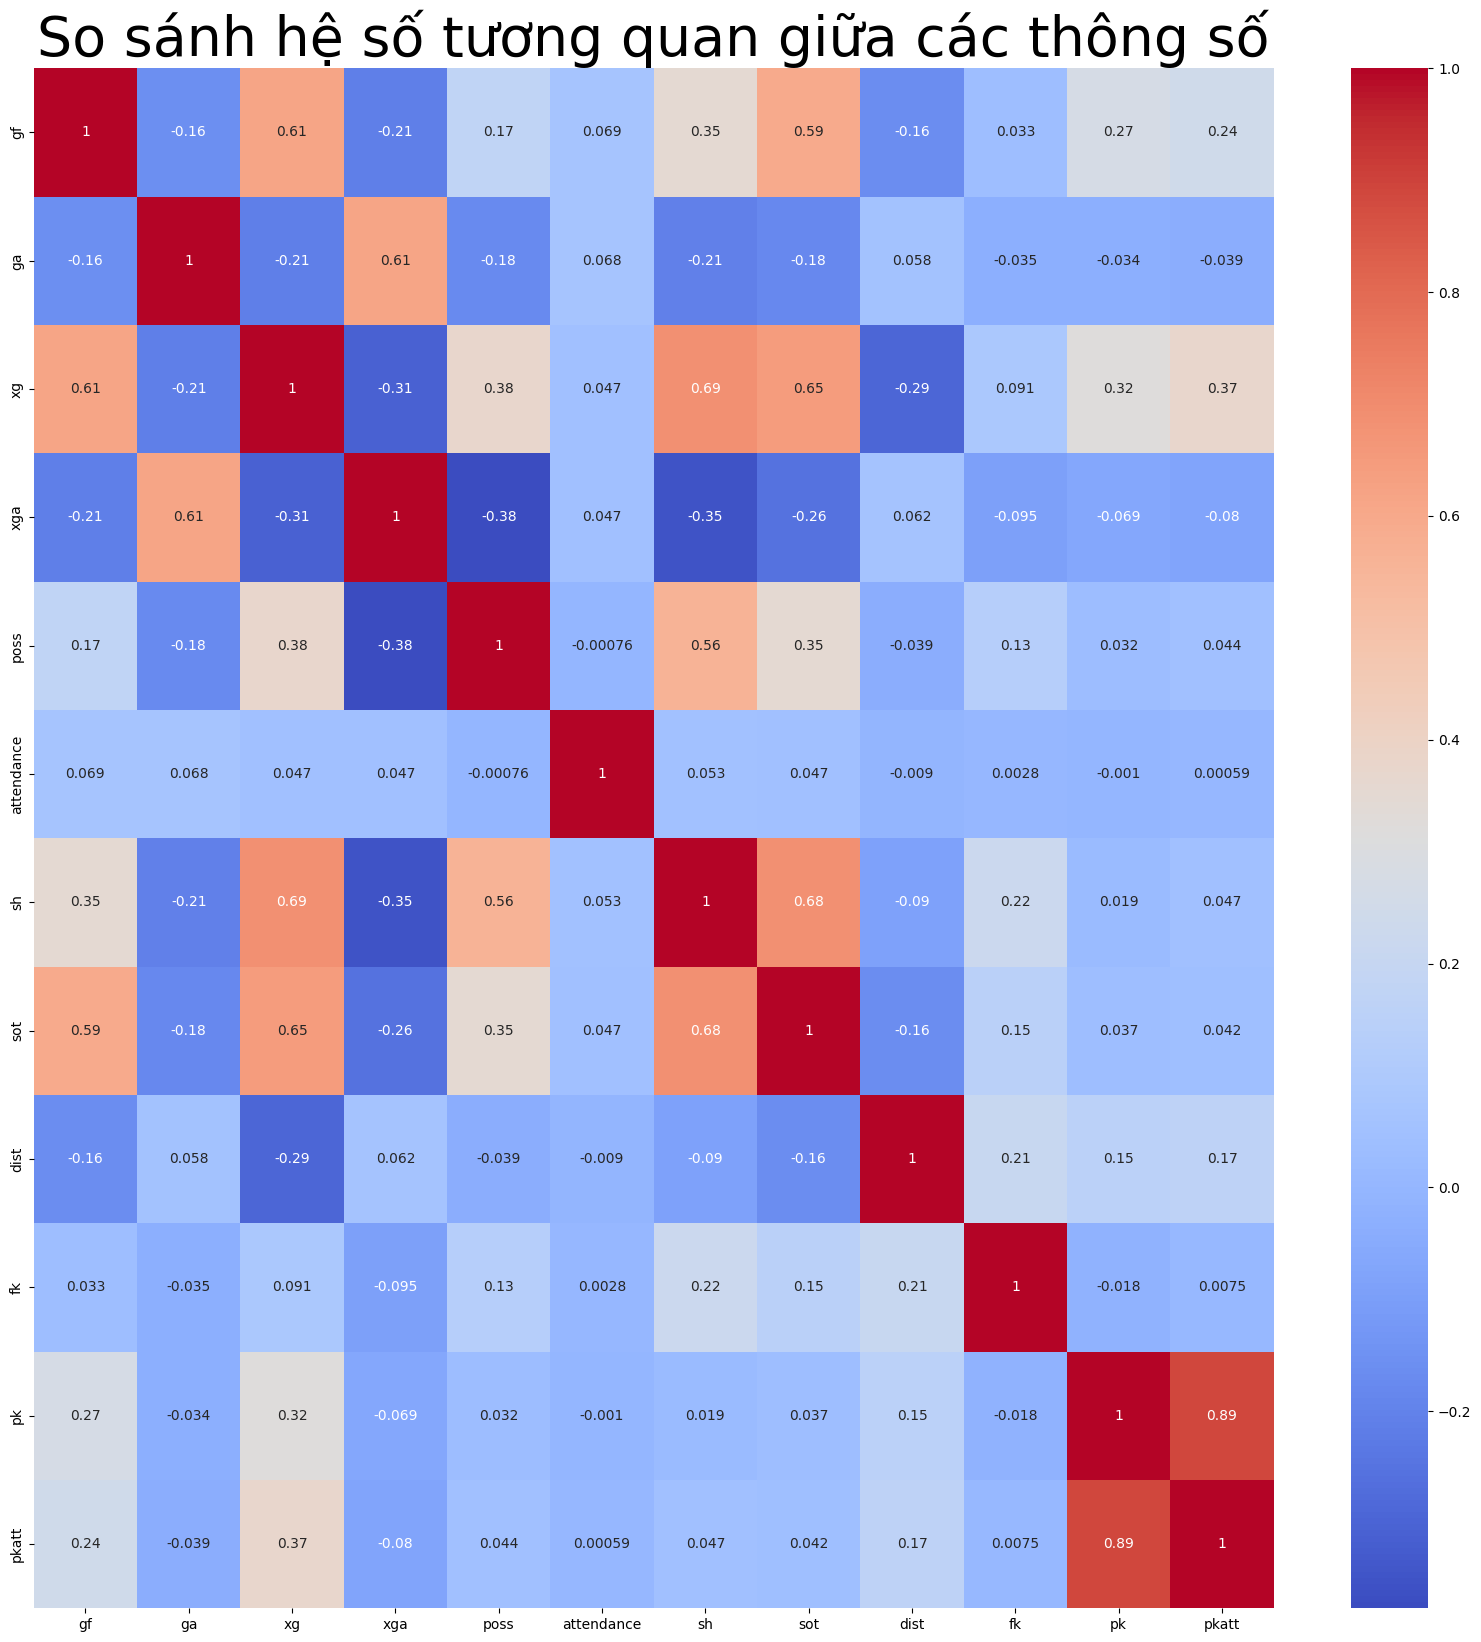

In [100]:
heatmap_first(df)

# Phân tích kết quả của biểu đồ 
- Giá trị của mỗi hệ số tương quan sẽ nằm trong [-1, 1]. Trong đó khi giá trị càng gần về -1 hoặc 1 thì mối quan hệ giữa các biến số càng mạnh. Giá trị gần 0 thì cho thấy sự độc lập giữa các biến số.
- Ví dụ khi giá trị gần về 1 sẽ cho thấy sự tích cực mạnh giữa 2 thuộc tính ( giá trị của thuộc tính này tăng thì thuộc tính kia cũng tăng ), khi gần về -1 sẽ tiêu cực mạnh ( giá trị thuộc tính này tăng thì giá trị thuộc tính kia giảm ).
- Thuộc tính pk và pkatt có mối quan hệ mạnh nhất.
- Mối quan hệ giữa thuộc tính attendance với bất kì các thuộc tính khác đều cho thấy sự độc lập cao.



# **Biểu đồ Heatmap so sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median**

# Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt, team, result
# Xử lý dữ liệu
- Gom nhóm các thông số theo từng đội.
- Sử dụng phương pháp min-max để chuẩn hóa các giá trị của các dữ liệu số.
- Với từng đội, các giá trị của một chỉ số ( trừ result ) được thu thập qua từng trận sẽ tìm mean và median và thông qua hệ số lệch skewness để chọn ra giá trị mean hay median sẽ làm giá trị đại diện cho chỉ số đó.
- Bỏ qua các giá trị trống của dữ liệu khi tính mean hoặc median.
- Riêng thuộc tính result, giữ lại các giá trị 'W'.
# Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [101]:
def findSkewnessBasedOnPearson(mean,median, standard_deviation):
    skewness = 3*(mean-median)/standard_deviation
    return skewness

def chooseMeanOrMedian(skewness):
    if math.fabs(skewness) < 0.5:
        return 'mean'
    return 'median'

In [106]:
def preprocessing_data(df):
    list_of_teams = df['team'].unique()
    list_of_attributes = ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt']
    df = df.loc[:, ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt', 'team', 'result']]
    df_norm = df[list_of_attributes]
    df_norm = (df_norm - df_norm.min())/(df_norm.max()-df_norm.min())

    df[list_of_attributes] = df_norm

    data = {team: {attribute: -1 for attribute in list_of_attributes} for team in list_of_teams}
    for team in list_of_teams:
        data[team]['result'] = -1
    for attribute in list_of_attributes:
        value_group_by_team = df.groupby('team')[attribute].apply(list)
        mean_s = value_group_by_team.apply(lambda x: np.nanmean(x))
        median_s = value_group_by_team.apply(lambda x: np.nanmedian(x))
        std_s = value_group_by_team.apply(lambda x: np.nanstd(x))
        value = {team: 0 for team in list_of_teams}
        for team in list_of_teams:
            skewness = findSkewnessBasedOnPearson(mean_s[team],median_s[team], std_s[team])
            option = chooseMeanOrMedian(skewness)
            if option == 'mean':
                value[team] = mean_s[team]
            else:
                value[team] = median_s[team]
        if len(set(value.values())) > 2:
            for team in list_of_teams:
                data[team][attribute] = value[team]
        else:
            for team in list_of_teams:
                del data[team][attribute]
    
    #xử lý cột result 
    win_result = {team: 0 for team in list_of_teams}
    value_group_by_team = df.groupby('team')['result'].apply(list)
    for team in list_of_teams:
        win_result[team] = value_group_by_team[team].count('W')
    
    min_win_value = min(win_result.values())
    max_win_value = max(win_result.values())
    for team in list_of_teams:
        data[team]['result'] = (win_result[team] - min_win_value)/(max_win_value-min_win_value)
    return data


In [107]:
def heatmap_second(data):    
    dt = pd.DataFrame.from_dict(data, orient='index')
    df_tall = dt.reset_index().melt(id_vars=['index'], var_name='Index', value_name='Value')
    df_tall = df_tall.rename(columns={'index': 'Team'})

    # Vẽ biểu đồ nhiệt
    plt.figure(figsize=(10, 10))
    plt.title("So sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median", fontsize=20)
    sns.heatmap(df_tall.pivot(index='Team', columns='Index', values='Value'), annot=True, cmap="coolwarm")
    plt.show()

In [108]:
data = preprocessing_data(df)

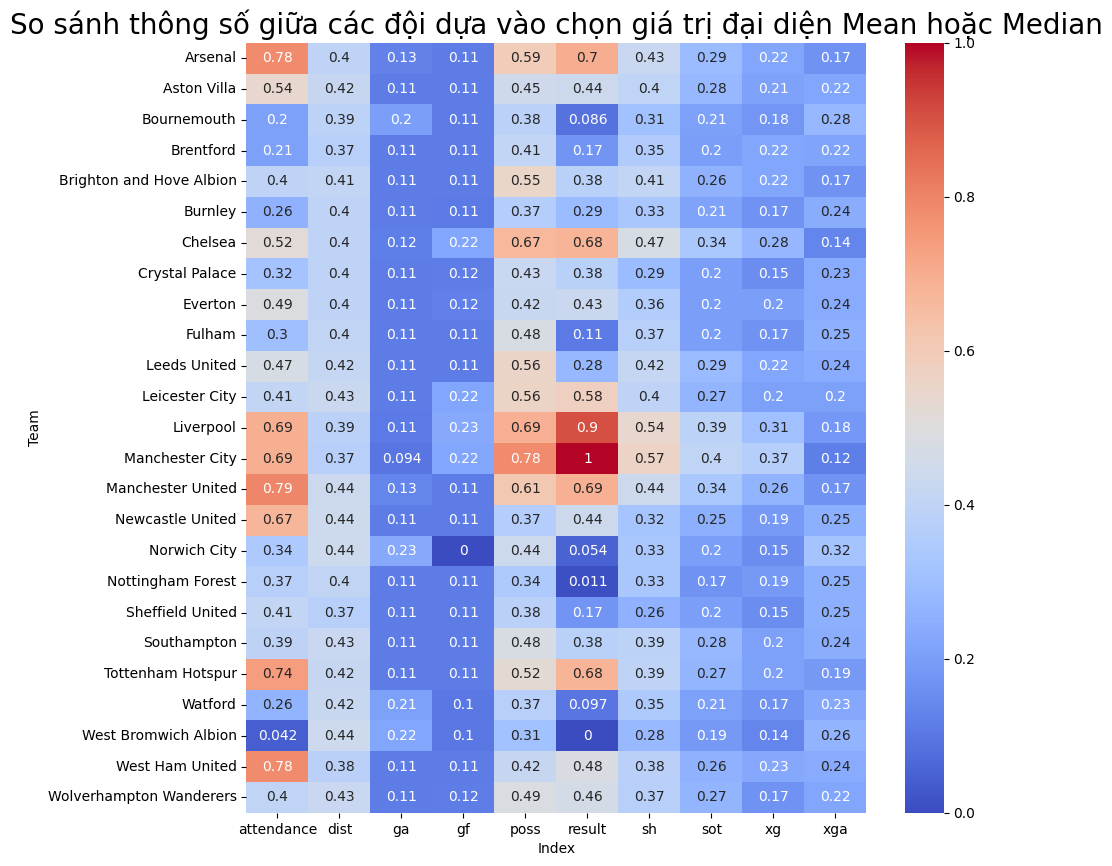

In [109]:
heatmap_second(data)

# Phân tích kết quả của biểu đồ
- Giá trị của mỗi chỉ số của 1 đội sẽ từ 0 đến 1. Trong đó giá trị tiến về 0 thì chỉ số càng thấp, giá trị tiến về 1 chỉ số càng vượt trội so với các đội khác.
- Dựa vào ngữ nghĩa mục tiêu khi vẽ biểu đồ, ta thấy đội Manchester City chiếm nhiều chỉ số trên sân vượt trội nhất với 4 trên 9 chỉ số ( poss, sh, sot, xg ).
- Từ đó ta thấy phần nào hợp lý khi đội Manchester City có số trận thắng nhiều nhất trong các đội. 